Collaborators: Ben DeSollar and Matt McDonell

In [215]:
# imports
import numpy as np
from mlwpy import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, neighbors,
                     naive_bayes,
                     model_selection as skms,
                     linear_model, dummy,
                     metrics,
                     pipeline,
                     preprocessing as skpre) 
import csv
from sklearn import tree

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



data_train_df = pd.read_csv("train.csv") 
data_train_ft = data_train_df.drop('PTS', axis=1)
data_train_tgt = data_train_df["PTS"]

Added Explanations

id                                    int64
FIRST_NAME                           object
LAST_NAME                            object
DISPLAY_FIRST_LAST                   object
DISPLAY_LAST_COMMA_FIRST             object
DISPLAY_FI_LAST                      object
PLAYER_SLUG                          object
BIRTHDATE                            object
SCHOOL                               object
COUNTRY                              object
LAST_AFFILIATION                     object
HEIGHT                              float64
WEIGHT                              float64
SEASON_EXP                            int64
JERSEY                               object
POSITION                             object
ROSTERSTATUS                         object
GAMES_PLAYED_CURRENT_SEASON_FLAG     object
TEAM_ID                               int64
TEAM_NAME                            object
TEAM_ABBREVIATION                    object
TEAM_CODE                            object
TEAM_CITY                       

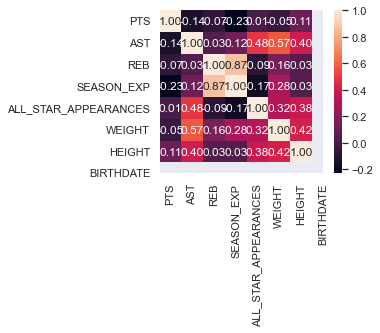

ScaledLR: -6.672158 (0.951973)
ScaledLASSO: -8.411187 (1.235133)
ScaledEN: -8.496856 (1.250486)
ScaledKNN-1: -8.653948 (1.521456)
ScaledKNN-3: -5.682438 (0.783832)
ScaledKNN-5: -5.330744 (1.018002)
ScaledKNN-7: -5.134970 (0.954137)
ScaledKNN-9: -5.062312 (0.838261)
ScaledKNN-11: -5.014162 (0.844301)
ScaledKNN-13: -5.073044 (0.828663)
ScaledKNN-15: -5.062845 (0.835755)
ScaledKNN-17: -5.086189 (0.792254)
ScaledKNN-19: -5.123270 (0.830200)
ScaledKNN-21: -5.130081 (0.829096)
ScaledKNN-23: -5.176501 (0.812951)
ScaledKNN-25: -5.205808 (0.812767)
ScaledKNN-27: -5.254445 (0.802504)
ScaledKNN-29: -5.323071 (0.800918)
ScaledKNN-31: -5.402680 (0.801008)
ScaledCART: -9.236349 (1.360673)
ScaledGBM: -4.773387 (0.707734)
-4.858495 (0.719092) with: {'n_estimators': 50}
-4.782325 (0.719604) with: {'n_estimators': 100}
-4.767227 (0.726746) with: {'n_estimators': 150}
-4.755234 (0.725986) with: {'n_estimators': 200}
-4.792584 (0.701359) with: {'n_estimators': 300}
-4.857803 (0.717516) with: {'n_estimator

In [216]:

#print(data_train_ft.isnull().any())

print(data_train_ft.dtypes)

#print(data_train_ft.head(3))

features = ['BIRTHDATE',\
            'SEASON_EXP',
            'HEIGHT',
            'WEIGHT',
            'AST',
            'REB',
            'ALL_STAR_APPEARANCES',
            ]
data_train_ft['BIRTHDATE'] = pd.to_datetime(data_train_ft['BIRTHDATE'])
data_train_ft['BIRTHDATE'] = 2022 - pd.DatetimeIndex(data_train_ft['BIRTHDATE']).year 
data_train_ft['BIRTHDATE'] = data_train_ft['BIRTHDATE'].astype(float)

data_train_ft['SEASON_EXP'] = data_train_ft['SEASON_EXP'].astype(float)

print(data_train_ft['BIRTHDATE'])
pd.set_option('precision', 2)
print(data_train_ft.describe())

data_train_ft['SEASON_EXP'] = data_train_ft['SEASON_EXP'].fillna(0)
data_train_ft['BIRTHDATE'] = data_train_ft['BIRTHDATE'].fillna(0)
data_train_ft['AST'] = data_train_ft['AST'].fillna(0)
data_train_ft['REB'] = data_train_ft['REB'].fillna(0)
data_train_ft['ALL_STAR_APPEARANCES'] = data_train_ft['ALL_STAR_APPEARANCES'].fillna(0)
data_train_ft['HEIGHT'] = data_train_ft['HEIGHT'].fillna(0)
data_train_ft['WEIGHT'] = data_train_ft['WEIGHT'].fillna(0)
data_train_ft = data_train_ft[features]
# data_train_ft['DRAFT_ROUND'].astype(int)


correlation_map = np.corrcoef(data_train_ft.values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

train_plus_validation_ftrs, test_ftrs, train_plus_validation_tgt, test_tgt = train_test_split (data_train_ft, data_train_tgt, test_size = 0.20,
                                   random_state = 42)

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
for k in range(1,32,2):
    pipelines.append((f'ScaledKNN-{k}', Pipeline([('Scaler', StandardScaler()),(f'KNN-{k}', KNeighborsRegressor(n_neighbors=k))])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, train_plus_validation_ftrs, train_plus_validation_tgt, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(train_plus_validation_ftrs)
rescaledX = scaler.transform(train_plus_validation_ftrs)
param_grid = dict(n_estimators=np.array([50,100,150,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, train_plus_validation_tgt)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(train_plus_validation_ftrs)
rescaled_train_plus_validation_ftrs = scaler.transform(train_plus_validation_ftrs)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(rescaled_train_plus_validation_ftrs, train_plus_validation_tgt)


# load data
test_df = pd.read_csv("test.csv")
test_df['BIRTHDATE'] = pd.to_datetime(test_df['BIRTHDATE'])
test_df['BIRTHDATE'] = 2022 - pd.DatetimeIndex(test_df['BIRTHDATE']).year 
test_df['BIRTHDATE'] = test_df['BIRTHDATE'].astype(float)

test_df['SEASON_EXP'] = test_df['SEASON_EXP'].astype(float)

print(test_df['BIRTHDATE'])
pd.set_option('precision', 2)
print(test_df.describe())

test_df['SEASON_EXP'] = test_df['SEASON_EXP'].fillna(0)
test_df['BIRTHDATE'] = test_df['BIRTHDATE'].fillna(0)
test_df['AST'] = test_df['AST'].fillna(0)
test_df['REB'] = test_df['REB'].fillna(0)
test_df['ALL_STAR_APPEARANCES'] = data_train_ft['ALL_STAR_APPEARANCES'].fillna(0)
test_df['HEIGHT'] = test_df['HEIGHT'].fillna(0)
test_df['WEIGHT'] = test_df['WEIGHT'].fillna(0)
# test_pts = test_df['PTS']
test_df = test_df[features]

test_df = test_df[features]

pd.set_option('precision', 2)

# transform the validation dataset
rescaled_test_ftrs = scaler.transform(test_df)
predictions = model.predict(rescaled_test_ftrs)

# compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : test_tgt})
# compare.head(10)
# This is just using the test.csv to setup a dataframe of the correct size
# and indicies (the "id" field).
make_submission_df = pd.read_csv("test.csv")
# drop all columns except 'id'
make_submission_df = make_submission_df[['id']]
# make sure the column of ID's that we just read in is the index column
make_submission_df = make_submission_df.set_index('id')

# just guess a value from 0 to 5
# probably won't perform very well
#predictions = np.random.rand(1350)*5

# Here, you add your predictions to the dataframe
make_submission_df['PTS'] = predictions

# Either one of these will work
# The first one will round all floating point numbers to 2 decimals
# Makes it easier to look at.
make_submission_df.to_csv('submission.csv',sep=',', float_format='%.2f')
#make_submission_df.to_csv('submission.csv',sep=',')
